<a href="https://colab.research.google.com/github/fionisarnen/clips-expert-system/blob/master/without_LL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supported Library**

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
import numpy as np

Using TensorFlow backend.


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import plot_model
from copy import deepcopy
from keras.models import Model
from keras import backend as K
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from time import time
from keras.callbacks import TensorBoard
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Keras Model

**Define** **Network**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(100,input_dim = 19,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [ ]:
def train_model(xx,yy,model,validation,verbose=1,epochs=20,loss="binary_crossentropy"):
  opt = optimizers.Adam(lr=0.00001)
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['acc'])
  history = model.fit(xx,yy,epochs=epochs,batch_size=32,verbose=verbose,validation_data=validation,callbacks=[es])
  return model,history

# Dataset import

## Task 1

In [ ]:
#Load dataset.csv for task 1 from drive
path = "/content/drive/My Drive/Colab Notebooks/Contoh/versi aing/WA_Fn-UseC_-Telco-Customer-Churn.csv"
task1 = pd.read_csv(path)

In [ ]:
#Encode Categorical
new = task1.columns.tolist()
le = LabelEncoder()
task1[new] = task1[new].apply(lambda col: le.fit_transform(col))
##
data1 = task1[new].drop(['customerID'], axis = 1) 
newdata = deepcopy(data1)

In [ ]:
#separating data and label class
target = newdata['Churn']
#feature data
data = newdata.drop(columns=['Churn'])
#cast it as input for our model
xA = data
yA = target

In [ ]:
#input for nn
x = data
y = target

## Task 2

In [ ]:
#Load dataset.csv for task 2 from drive
path2 = "/content/drive/My Drive/Colab Notebooks/Contoh/versi aing/bigml_59c28831336c6604c800002a.csv"
task2 = pd.read_csv(path2)

In [ ]:
#Encode Categorical
new = task2.columns.tolist()
le = LabelEncoder()
task2[new] = task2[new].apply(lambda col: le.fit_transform(col))
data2 = task2[new].drop(['phone number'], axis = 1) 
newdata = deepcopy(data2)

In [ ]:
#separating data and label class
target = newdata['churn']
#feature data
data = newdata.drop(columns=['churn'])
#cast it as input for our model
xB = data
yB = target

# Create and fit Model

In [ ]:
model = create_model()
model,historyA = train_model(xA,yA,model,[xA,yA],epochs=50)

Train on 7043 samples, validate on 7043 samples
Epoch 1/50
7043/7043 [==============================] - 1s 81us/step - loss: 185.7372 - acc: 0.7346 - val_loss: 171.0421 - val_acc: 0.7346
Epoch 2/50
7043/7043 [==============================] - 0s 63us/step - loss: 156.7023 - acc: 0.7346 - val_loss: 142.1731 - val_acc: 0.7346
Epoch 3/50
7043/7043 [==============================] - 0s 62us/step - loss: 128.1142 - acc: 0.7346 - val_loss: 113.6178 - val_acc: 0.7346
Epoch 4/50
7043/7043 [==============================] - 0s 65us/step - loss: 99.1884 - acc: 0.7346 - val_loss: 84.6695 - val_acc: 0.7346
Epoch 5/50
7043/7043 [==============================] - 0s 64us/step - loss: 70.1174 - acc: 0.7346 - val_loss: 55.3571 - val_acc: 0.7346
Epoch 6/50
7043/7043 [==============================] - 0s 62us/step - loss: 40.8949 - acc: 0.7341 - val_loss: 26.0641 - val_acc: 0.7338
Epoch 7/50
7043/7043 [==============================] - 0s 65us/step - loss: 12.9405 - acc: 0.6954 - val_loss: 4.7514 - val_

**Sequential Training**

1# Catastrophic Forgetting

Skenario : xA,yA sebagai previous task dan
xB,yB sebagai new task

In [ ]:
model,historyB = train_model(xB,yB,model,[xA,yA],epochs=50)

Train on 3333 samples, validate on 7043 samples
Epoch 1/50
3333/3333 [==============================] - 0s 127us/step - loss: 113.8669 - acc: 0.8551 - val_loss: 186.3951 - val_acc: 0.2666
Epoch 2/50
3333/3333 [==============================] - 0s 94us/step - loss: 43.7862 - acc: 0.8122 - val_loss: 327.4163 - val_acc: 0.2654
Epoch 3/50
3333/3333 [==============================] - 0s 93us/step - loss: 17.1016 - acc: 0.7210 - val_loss: 337.7069 - val_acc: 0.2655
Epoch 4/50
3333/3333 [==============================] - 0s 97us/step - loss: 7.1277 - acc: 0.7237 - val_loss: 335.8279 - val_acc: 0.2657
Epoch 5/50
3333/3333 [==============================] - 0s 91us/step - loss: 4.3922 - acc: 0.7447 - val_loss: 340.1931 - val_acc: 0.2662
Epoch 6/50
3333/3333 [==============================] - 0s 89us/step - loss: 3.2592 - acc: 0.7651 - val_loss: 365.3448 - val_acc: 0.2664
Epoch 7/50
3333/3333 [==============================] - 0s 89us/step - loss: 2.7142 - acc: 0.7765 - val_loss: 395.7359 - val_

([60.3403296872656, 0.8550854921340942],
 [0.516727049773802, 0.7545080184936523],
 0.2662217915058136)

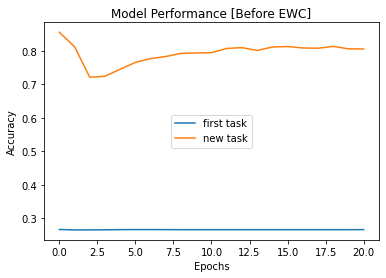

In [ ]:
plt.plot(historyB.history["val_acc"])
plt.plot(historyB.history["acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['first task','new task'], loc='center')
plt.title("Model Performance [Before EWC]")
plt.savefig('image_before EWC.png', format='png', dpi=1200)
model.evaluate(xB,yB,verbose=0),model.evaluate(xA,yA,verbose=0),max(historyB.history["val_acc"][10:])

In [ ]:
model.summary()